## Load data

In [1]:
!pwd

/notebooks


In [2]:
!git clone https://github.com/sunh0003/W251_FinalProject.git

fatal: destination path 'W251_FinalProject' already exists and is not an empty directory.


In [3]:
%mkdir data

mkdir: cannot create directory ‘data’: File exists


In [4]:
%cd W251_FinalProject

/notebooks/W251_FinalProject


In [5]:
%cd Kaggle

/notebooks/W251_FinalProject/Kaggle


In [6]:
%mkdir /notebooks/data/train

mkdir: cannot create directory ‘/notebooks/data/train’: File exists


In [7]:
from shutil import unpack_archive
unpack_archive('train1.zip', '/notebooks')
unpack_archive('train2.zip', '/notebooks')
unpack_archive('train3.zip', '/notebooks')
unpack_archive('validation.zip', '/notebooks')

In [8]:
%mv /notebooks/train1/fear /notebooks/data/train
%mv /notebooks/train1/happy /notebooks/data/train
%mv /notebooks/train2/netural /notebooks/data/train
%mv /notebooks/train2/sad /notebooks/data/train
%mv /notebooks/train2/suprise /notebooks/data/train
%mv /notebooks/train3/angry /notebooks/data/train
%mv /notebooks/train3/disgust /notebooks/data/train
%mv /notebooks/validation /notebooks/data

mv: cannot move '/notebooks/train1/fear' to '/notebooks/data/train/fear': Directory not empty
mv: cannot move '/notebooks/train1/happy' to '/notebooks/data/train/happy': Directory not empty
mv: cannot stat '/notebooks/train2/netural': No such file or directory
mv: cannot move '/notebooks/train2/sad' to '/notebooks/data/train/sad': Directory not empty
mv: cannot stat '/notebooks/train2/suprise': No such file or directory
mv: cannot move '/notebooks/train3/angry' to '/notebooks/data/train/angry': Directory not empty
mv: cannot move '/notebooks/train3/disgust' to '/notebooks/data/train/disgust': Directory not empty
mv: cannot move '/notebooks/validation' to '/notebooks/data/validation': Directory not empty


In [1]:
!pwd

/notebooks


## Model

In [10]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.5/dist-packages (20.1.1)


In [11]:
!pip3 install pillow

In [69]:
! rmdir /notebooks/data/validation/.ipynb_checkpoints

rmdir: failed to remove '/notebooks/data/validation/.ipynb_checkpoints': No such file or directory


# run littleVGG

In [2]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from keras.regularizers import l1

Using TensorFlow backend.


In [3]:
num_classes = 9
img_rows, img_cols = 48, 48
batch_size = 512

train_data_dir = '/notebooks/data/train'
validation_data_dir = '/notebooks/data/validation'

In [4]:
# Let's use some data augmentaiton 
# train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
        rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 29992 images belonging to 9 classes.
Found 7358 images belonging to 9 classes.


In [5]:
print(validation_generator.class_indices)

{'happy': 5, 'surprise': 8, 'confused': 1, 'neutral': 6, 'angry': 0, 'distracted': 3, 'fear': 4, 'disgust': 2, 'sad': 7}


In [9]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001),input_shape=(48,48,1)))
# model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(9, kernel_size=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# # model.add(BatchNormalization())

model.add(Conv2D(9, kernel_size=(4, 4), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())

model.add(Flatten())

model.add(Activation("softmax"))

model.summary()
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(7, activation='softmax'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)         0         
__________

In [7]:
%mkdir littleVGG

In [ ]:
%%time
filepath = os.path.join("/notebooks/littleVGG/model_littleVGG_{epoch}.hdf5")

checkpoint = keras.callbacks.ModelCheckpoint(filepath,
                                             monitor='val_acc',
                                             verbose=1,
                                             save_best_only=True,
                                             mode='max')
callbacks = [checkpoint]
# if mode == "train":
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
nb_train_samples = 29992
nb_validation_samples = 7358
epochs = 150
model_info = model.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            callbacks = callbacks,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size)

Epoch 1/150
58/58 [==============================] - 300s 5s/step - loss: 1.8755 - acc: 0.2675 - val_loss: 1.8631 - val_acc: 0.2937

Epoch 00001: val_acc improved from -inf to 0.29375, saving model to /notebooks/littleVGG/model_littleVGG_1.hdf5
Epoch 2/150
58/58 [==============================] - 300s 5s/step - loss: 1.8771 - acc: 0.2660 - val_loss: 1.8629 - val_acc: 0.2916

Epoch 00002: val_acc did not improve from 0.29375
Epoch 3/150
58/58 [==============================] - 300s 5s/step - loss: 1.8684 - acc: 0.2684 - val_loss: 1.8652 - val_acc: 0.2876

Epoch 00003: val_acc did not improve from 0.29375
Epoch 4/150
58/58 [==============================] - 296s 5s/step - loss: 1.8688 - acc: 0.2683 - val_loss: 1.8585 - val_acc: 0.2956

Epoch 00004: val_acc improved from 0.29375 to 0.29565, saving model to /notebooks/littleVGG/model_littleVGG_4.hdf5
Epoch 5/150
58/58 [==============================] - 298s 5s/step - loss: 1.8644 - acc: 0.2702 - val_loss: 1.8560 - val_acc: 0.2961

Epoch 00

58/58 [==============================] - 206s 4s/step - loss: 1.7323 - acc: 0.3359 - val_loss: 1.6759 - val_acc: 0.3625

Epoch 00038: val_acc did not improve from 0.36372
Epoch 39/150
58/58 [==============================] - 206s 4s/step - loss: 1.7234 - acc: 0.3414 - val_loss: 1.6686 - val_acc: 0.3675

Epoch 00039: val_acc improved from 0.36372 to 0.36747, saving model to /notebooks/littleVGG/model_littleVGG_39.hdf5
Epoch 40/150
58/58 [==============================] - 207s 4s/step - loss: 1.7288 - acc: 0.3405 - val_loss: 1.6594 - val_acc: 0.3634

Epoch 00040: val_acc did not improve from 0.36747
Epoch 41/150
58/58 [==============================] - 208s 4s/step - loss: 1.7260 - acc: 0.3370 - val_loss: 1.6576 - val_acc: 0.3576

Epoch 00041: val_acc did not improve from 0.36747
Epoch 42/150
58/58 [==============================] - 210s 4s/step - loss: 1.6876 - acc: 0.3603 - val_loss: 1.6206 - val_acc: 0.3932

Epoch 00062: val_acc did not improve from 0.40038
Epoch 63/150
58/58 [=======

## Analyze the result

In [14]:
print(model_info.history.keys())

import matplotlib.pyplot as plt
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['acc', 'loss', 'val_loss', 'val_acc'])


<Figure size 640x480 with 1 Axes>

## Confusion Matrix

Found 7358 images belonging to 9 classes.
Confusion Matrix
[[ 239    6    0    0   70  174  260  149   62]
 [   0  158    0    0    0    0    4    0    0]
 [  25    0    0    0    9   34   25   13    5]
 [   0  116    0    0    0    0   10    0    4]
 [ 116    2    0    0  123  192  232  147  206]
 [  91    9    0    0   34 1343  182   95   71]
 [  62    5    0    0   42  194  702  154   57]
 [ 119    8    0    0   63  196  369  329   55]
 [  26    1    0    0   50   80   71   31  538]]
Classification Report
              precision    recall  f1-score   support

       angry       0.35      0.25      0.29       960
    confused       0.52      0.98      0.68       162
     disgust       0.00      0.00      0.00       111
  distracted       0.00      0.00      0.00       130
        fear       0.31      0.12      0.17      1018
       happy       0.61      0.74      0.67      1825
     neutral       0.38      0.58      0.46      1216
         sad       0.36      0.29      0.32      1139

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


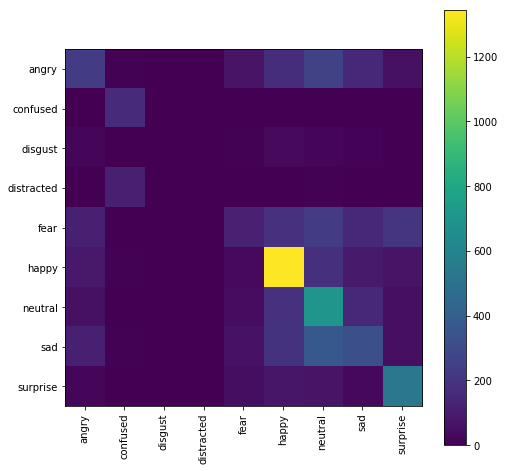

In [17]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Found 29992 images belonging to 9 classes.
#Found 7358 images belonging to 9 classes.

nb_train_samples = 29992
nb_validation_samples = 7358

# We need to recreate our validation generator with shuffle = false
validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)#[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

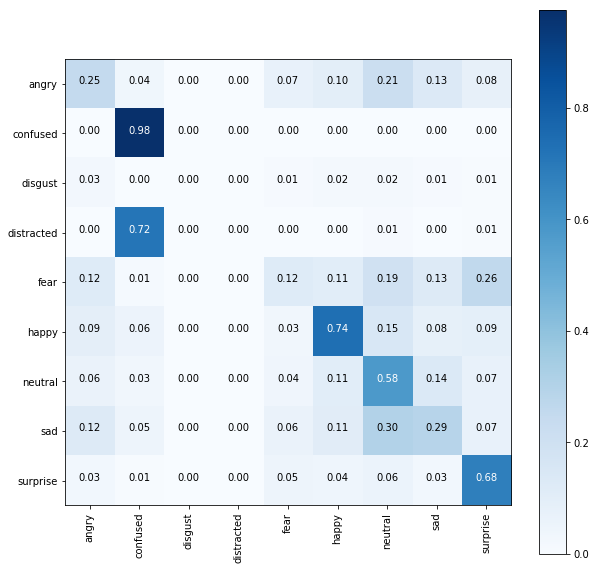

In [22]:
import itertools
cm=cnf_matrix
cm = cm.astype('float') / cm.sum(axis=1)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

In [ ]:
# option 2: setup transfer learning code, using 9 classes wts for 7 classes - Michelle

## Model 2 : littleVGG